<a href="https://colab.research.google.com/github/sugi-san/latent-diffusion/blob/main/LDM_TXT2IM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

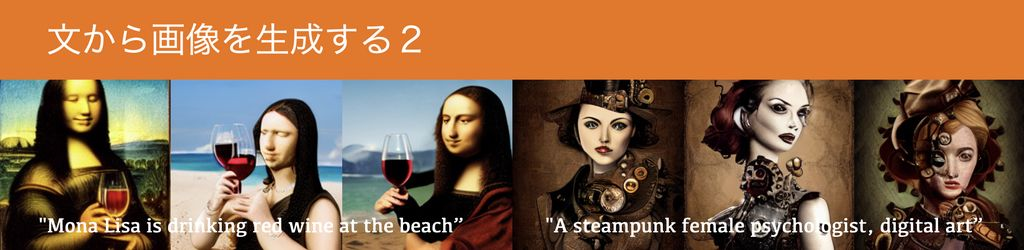

In [ ]:
#@title **1.セットアップ（数分くらい掛かります）**
%cd /content
!nvidia-smi
!git clone https://github.com/sugi-san/latent-diffusion.git
!git clone https://github.com/CompVis/taming-transformers
!pip -q install -e ./taming-transformers
!pip -q install omegaconf pytorch-lightning torch-fidelity einops transformers
%cd latent-diffusion
!mkdir -p models/ldm/text2img-large/
!wget -nc -O models/ldm/text2img-large/model.ckpt https://ommer-lab.com/files/latent-diffusion/nitro/txt2img-f8-large/model.ckpt
!mkdir download


＊なお、動作の途中で下記のような**「まだ操作中ですか？」**という表示が現れることがあります。その時は**「私はロボットではありません」**をクリックして下さい。

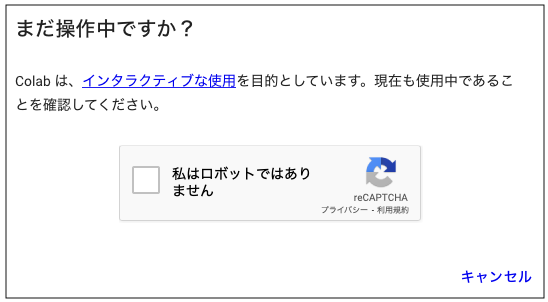

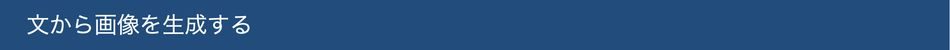

In [ ]:
#@title **2.文から画像の生成（10分くらいで16枚生成します）**

# outputsフォルダーリセット
import os
import shutil
if os.path.isdir('outputs'):
    shutil.rmtree('outputs')
os.makedirs('outputs', exist_ok=True)


prompt = 'A steampunk cat, digital art' #@param {type: 'string'}
plms = False 
ddim_eta = 0 
n_samples = 4 
n_iter = 4 
scale =  5
ddim_steps = 50
W = 256 
H = 256 
outdir = 'outputs' 
from google.colab.patches import cv2_imshow
import cv2
from time import time
start = time()
plms_arg = ''
if plms:
  plms_arg = '--plms'
!python scripts/txt2img.py --prompt "$prompt" --ddim_eta $ddim_eta --n_samples $n_samples --n_iter $n_iter --scale $scale --ddim_steps $ddim_steps --H $H --W $W --outdir $outdir $plms_arg
print(f'Took {time()-start:.0f} secs.')

# ログ・クリア
from IPython.display import clear_output
clear_output()

filename = f'{outdir}/{prompt.replace(" ", "-")}.png'
print(filename)
im = cv2.imread(filename)
cv2_imshow(im)

In [ ]:
#@title **3.画像のダウンロード**
import shutil
!zip -jrqFS ldm.zip "$outdir"
name = prompt.replace(' ', '-')
shutil.copy('ldm.zip', 'download/'+name+'.zip')

from google.colab import files
files.download('download/'+name+'.zip')

###【備考】
・ブラウザは、必ずGoogle Chromeを使用して下さい。

・動作がおかしくなった場合の対応\
１）グーグルクロームの該当タブを削除して接続を切る\
２）再度リンクを開く\
３）右上にある「ランタイム／ランタイムを出荷時設定にリセット」をクリックする（下記写真を参照に下さい）\
４）あとは、動画にある通りの操作をすればOK

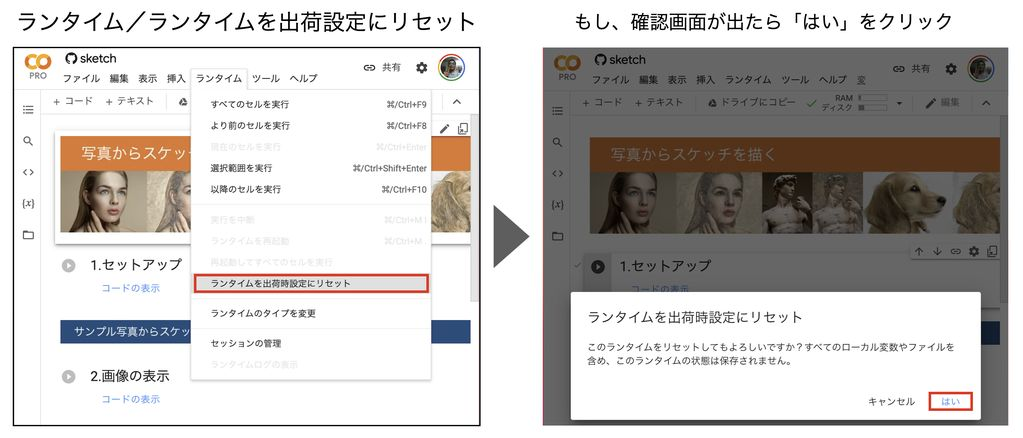